In [1]:
import sys
import time
import math
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt

Минимальная энергия: 1e-3
windows (w) or linux (l): w


In [2]:
# Параметры пучка электронов и мишени
target = R(Material(50), 1e-2)
beams_energy = 0.075
brem = target.brem(beams_energy)
brem_e = brem * en

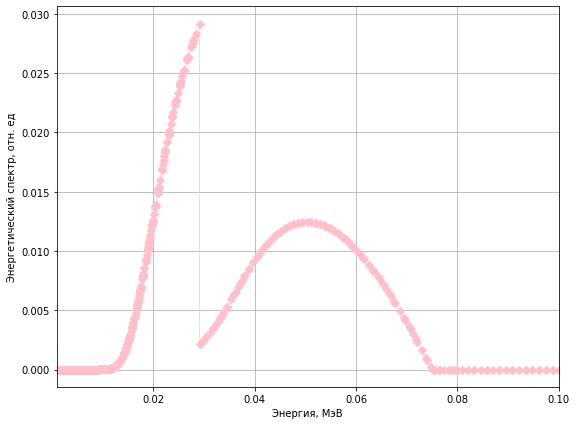

In [3]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(en, brem_e, ls='-', marker='D', lw='0.7', ms=5, color='pink')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.10e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

Номер первого канала и К-скачки

In [5]:
n = 11

In [6]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [ ]:
EDGE.remove(EDGE[EDGE.index(Material(50).k_index())])

Значения максимумов в К-крае пропускания

In [28]:
space_1 = np.linspace(0.001, 0.9, 201)
for i, val in enumerate(space_1):
    space_1[i] = round(val, 5)
    
edge_max_values = []
edge_max_values.extend(space_1)

Спектральные характеристики чувствительности каналов

In [7]:
edge_thiknesses = [[Material(i).lt(j) for i in range(n, 101)] for j in edge_max_values]
edge_regions = [[R(Material(i+n), edge_thiknesses[j][i]) for i in range(0, len(edge_thiknesses[j]))] for j in range(len(edge_thiknesses))]
resp_edges = [[val.f() for val in edge_regions[j]] for j in range(len(edge_regions))]

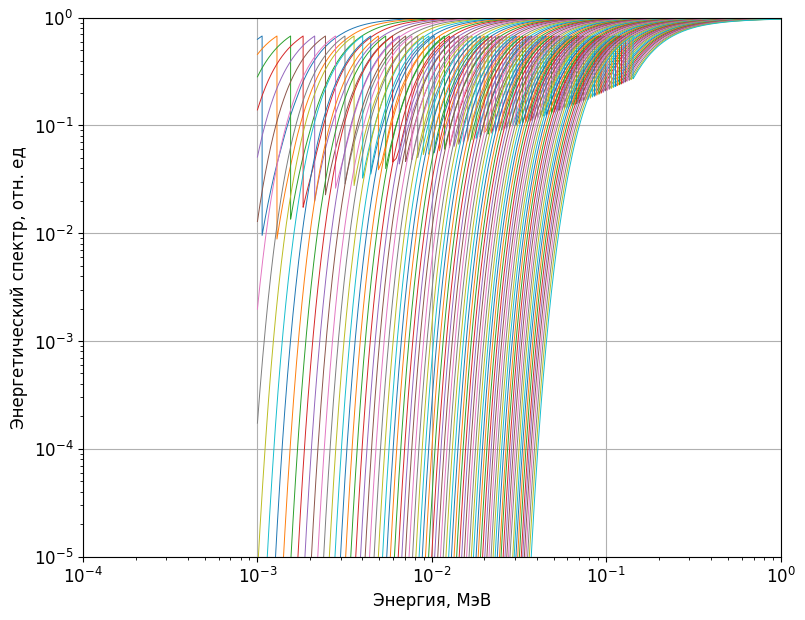

In [10]:
fig, ax = plt.subplots(figsize=(9, 7))

for i in resp_edges[150]:
    ax.plot(en, i, ls='-', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-4, 1e0)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

Отклики каналов

In [16]:
from garipov_deconvolution import get_coeff_simpson

In [24]:
signals_simpson = []

import time
start_time = time.time()

for j in range(len(resp_edges)):
    print(f'({j}), время: {round(time.time() - start_time, 5)}, секунд')
    signals = []
    for response in resp_edges[j]:
        signals.append(sum(get_coeff_simpson(response*brem_e, en, EDGE)[0]))
        
    signals_simpson.append(signals)

(0), время: 0.00106, секунд
(1), время: 2.85487, секунд
(2), время: 5.70738, секунд
(3), время: 8.58593, секунд
(4), время: 11.48174, секунд
(5), время: 14.29694, секунд
(6), время: 17.14322, секунд
(7), время: 20.04197, секунд
(8), время: 22.89718, секунд
(9), время: 25.73852, секунд
(10), время: 28.54826, секунд
(11), время: 31.5566, секунд
(12), время: 34.46405, секунд
(13), время: 37.29416, секунд
(14), время: 40.12126, секунд
(15), время: 43.24392, секунд
(16), время: 46.0873, секунд
(17), время: 48.93324, секунд
(18), время: 51.7228, секунд
(19), время: 54.48185, секунд
(20), время: 57.28151, секунд
(21), время: 60.12165, секунд
(22), время: 62.98569, секунд
(23), время: 65.76725, секунд
(24), время: 68.53553, секунд
(25), время: 71.25016, секунд
(26), время: 73.96656, секунд
(27), время: 76.67811, секунд
(28), время: 79.38439, секунд
(29), время: 82.10413, секунд
(30), время: 84.81608, секунд
(31), время: 87.52802, секунд
(32), время: 90.23706, секунд
(33), время: 92.95027, секу

In [9]:
resp_edges = np.load('./resp_edges.npy')
signals_simpson = np.load('./signals_simpson_edges.npy')

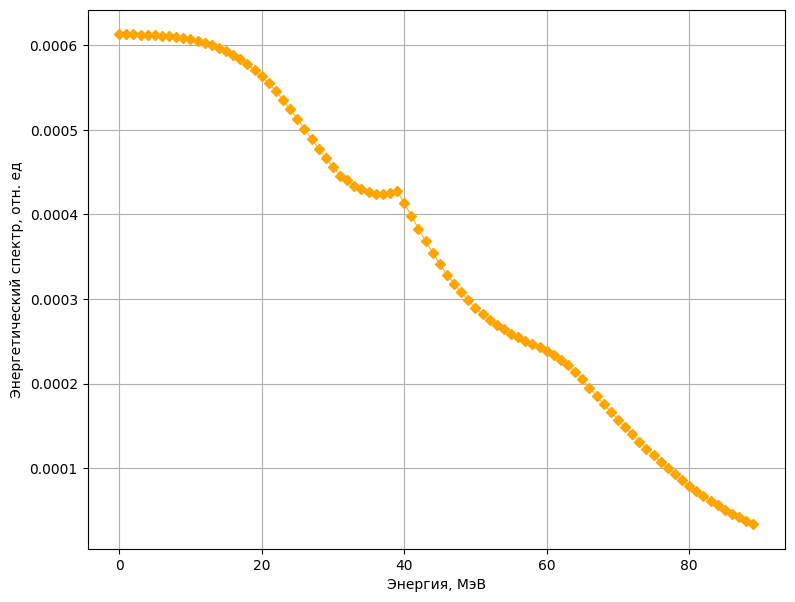

In [12]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(list(range(len(signals_simpson[1]))), signals_simpson[180], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

Матрица задачи

In [17]:
Matrixs = []

start_time = time.time()

for i in range(len(resp_edges)):
    print(f'({i}), время: {round(time.time() - start_time, 5)}, секунд')
    matrix = []
    
    for response in resp_edges[i]:
        matrix.append(get_coeff_simpson(response, en, EDGE)[0])
    
    Matrixs.append(matrix)

(0), время: 0.00041, секунд
(1), время: 2.55957, секунд
(2), время: 5.103, секунд
(3), время: 8.19768, секунд
(4), время: 11.13029, секунд
(5), время: 13.85425, секунд
(6), время: 16.4929, секунд
(7), время: 19.20991, секунд
(8), время: 21.80673, секунд
(9), время: 24.50964, секунд
(10), время: 27.29571, секунд
(11), время: 29.79621, секунд
(12), время: 32.29535, секунд
(13), время: 34.79063, секунд
(14), время: 37.28905, секунд
(15), время: 39.77828, секунд
(16), время: 42.27046, секунд
(17), время: 44.75852, секунд
(18), время: 47.27151, секунд
(19), время: 49.76225, секунд
(20), время: 52.25455, секунд
(21), время: 54.75802, секунд
(22), время: 57.25199, секунд
(23), время: 59.74658, секунд
(24), время: 62.23801, секунд
(25), время: 64.73311, секунд
(26), время: 67.22426, секунд
(27), время: 69.71643, секунд
(28), время: 72.21835, секунд
(29), время: 74.71371, секунд
(30), время: 77.20874, секунд
(31), время: 79.70798, секунд
(32), время: 82.20387, секунд
(33), время: 84.70194, секу

In [32]:
np.save('Matrixs_edges.npy', Matrixs)

In [21]:
from garipov_deconvolution import*

In [18]:
sp = [0 for i in range(len(signals_simpson))]
norm = [0 for i in range(len(signals_simpson))]
decb = [0 for i in range(len(signals_simpson))]
dev = [0 for i in range(len(signals_simpson))]

new_en = get_coeff_simpson(resp_edges[0][0], en, EDGE)[1]

In [22]:
def Gold(A, b, en, init_spectrum, dec_en, x0=False, it=None, w=False, d=False):
    A = np.array(A)
    b = np.array(b)
    b = b.reshape(len(b), -1)

    def deviation(init_spectrum, dec_spectrum):
        dec_spectrum_on_init_grid = np.interp(en, dec_en, dec_spectrum)
        different = [(i - j) ** 2 for i, j in zip(dec_spectrum_on_init_grid, init_spectrum)]
        init_sq = [val ** 2 for val in init_spectrum]

        def integral_t(different_signal, grid):
            s = 0
            for i in range(1, len(different_signal) - 2):
                s += (grid[i] - grid[i - 1]) * different_signal[i - 1]
            return s

        dev = integral_t(different, en) / integral_t(init_sq, en)
        return dev

    # Если начальное приближение не задано создает вектор-столбец x0 = [1, 1,.., 1]
    if x0:
        previous_x = np.ones((A.shape[1], 1), dtype=np.float64)
    # Транспонирование вектора х0, если он считывается вектором-строкой
    else:
        x0 = float(input('Введите начальное приближение: '))
        previous_x = x0 * np.ones((A.shape[1], 1), dtype=np.float64)
    # Транспонирование вектора b, если он считывается вектором-строкой
    if b.shape[1] != 1:
        b = b.T
    if it is None:
        num_of_iter = int(input('Введите число итераций: '))
    else:
        num_of_iter = it

    if w == False:
        W = np.diag([float(1 ** 2) for i in range(0, len(b))])
    if w == True:
        W = np.diag([float(i) for i in range(0, len(b))])

    current_x = np.ones((A.shape[1], 1), dtype=np.float64)
    norm_list = []
    deviation_list = []

    # Основной цикл алгоритма Голда
    for k in range(0, num_of_iter + 1):
        # Создание матрицы Y = A.T * W.T * W * b
        Y = np.dot(A.T, np.dot(W.T, np.dot(W, b)))
        # Создание матрицы AX = A.T * W.T * W * A * x
        AX = np.dot(A.T, np.dot(W.T, np.dot(W, np.dot(A, previous_x))))
        AX[AX == 0] = np.nextafter(0, 1)*1e20
        current_x = 1.0 * previous_x + (previous_x / AX) * (Y - AX)
        previous_x = current_x

        norm_list.append(linalg.norm(np.dot(A, current_x) - b))
        if d == True:
            deviation_list.append(deviation(init_spectrum, current_x.reshape(1, 1)[0].tolist()) ** 0.5)

    norm = [range(1, num_of_iter + 2), norm_list]

    if d == True:
        dev = [range(1, num_of_iter + 2), deviation_list]
    if d == False:
        dev = deviation(init_spectrum, current_x.reshape(1, -1)[0].tolist())**0.5


    current_x = current_x.reshape(1, -1)
    current_x = current_x[0].tolist()

    return current_x, norm, dev

In [36]:
import time
# восстановление спектра методом Голда на основании К-фильтров
start_time = time.time()
for j in range(len(signals_simpson)):
    sp[j], norm[j], dev[j] = Gold(Matrixs[j], signals_simpson[j], en, brem_e, new_en, 1, 20000, w=True, d=False)[:3]
    print(f'({j}), время: {time.time() - start_time}, секунд')

(0), время: 4.931098222732544, секунд
(1), время: 10.197690486907959, секунд
(2), время: 15.3627188205719, секунд
(3), время: 20.17073941230774, секунд
(4), время: 24.927168369293213, секунд
(5), время: 29.713345289230347, секунд
(6), время: 34.457175493240356, секунд
(7), время: 39.146028995513916, секунд
(8), время: 43.839518785476685, секунд
(9), время: 48.514060974121094, секунд
(10), время: 53.061055183410645, секунд
(11), время: 57.712451457977295, секунд
(12), время: 62.321086406707764, секунд
(13), время: 67.12978529930115, секунд
(14), время: 71.73813104629517, секунд
(15), время: 76.39249420166016, секунд
(16), время: 81.01218438148499, секунд
(17), время: 85.62283897399902, секунд
(18), время: 90.22257089614868, секунд
(19), время: 94.78819465637207, секунд
(20), время: 99.29977250099182, секунд
(21), время: 103.77517318725586, секунд
(22), время: 108.37392520904541, секунд
(23), время: 112.87115478515625, секунд
(24), время: 117.36737132072449, секунд
(25), время: 121.87318

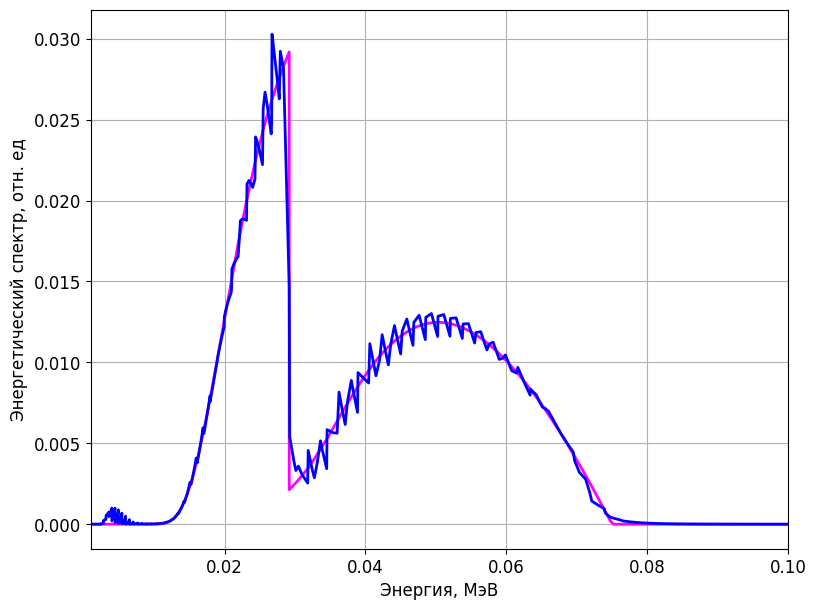

In [37]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(en, brem_e, ls='-', lw='2', ms=5, color='magenta')
ax.plot(new_en, sp[20], ls='-', lw='2', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

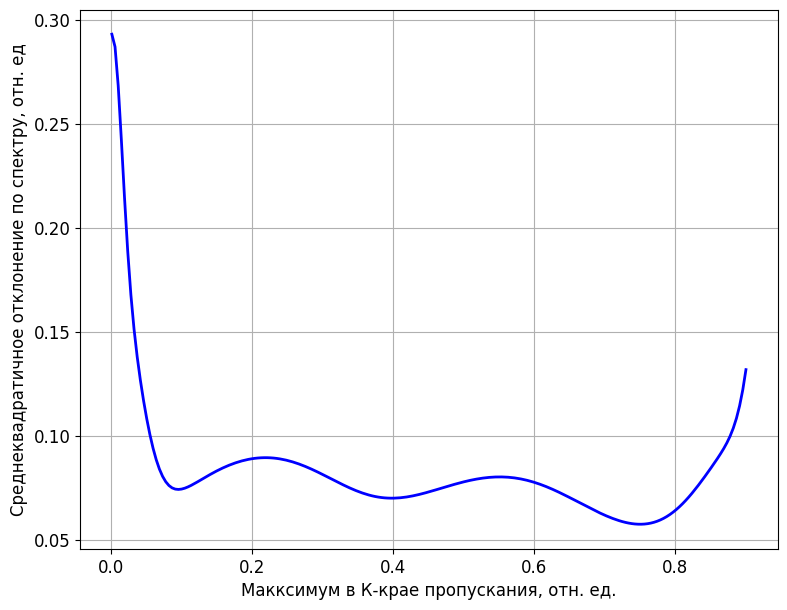

In [41]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(edge_max_values, dev, ls='-', lw='2', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Макксимум в К-крае пропускания, отн. ед.', fontsize=12)
ax.set_ylabel('Среднеквадратичное отклонение по спектру, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

# fig.savefig('Зависимость средней квадратичной невязки от максимума для краевых фильтров.jpg', bbox_inches='tight')

In [40]:
np.save('spectrums_edges.npy', sp)
np.save('deviations_edges.npy', dev)